In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
diamond = pd.read_csv("diamonds.csv")

In [3]:
diamond.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1,0.51,Premium,4,F,VS1,4,1749
1,2,2.25,Fair,1,G,I1,1,7069
2,3,0.70,Very Good,3,E,VS2,5,2757
3,4,0.47,Good,2,F,VS1,4,1243
4,5,0.30,Ideal,5,G,VVS1,7,789


In [4]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   50000 non-null  int64  
 1   carat        50000 non-null  float64
 2   cut          50000 non-null  object 
 3   cut_ord      50000 non-null  int64  
 4   color        50000 non-null  object 
 5   clarity      50000 non-null  object 
 6   clarity_ord  50000 non-null  int64  
 7   price        50000 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 3.1+ MB


In [5]:
diamond.corr()

,Unnamed: 0,carat,cut_ord,clarity_ord,price
Unnamed: 0,1.000000,-0.002164,0.001330,0.000927,-0.001947
carat,-0.002164,1.000000,-0.135679,-0.343725,0.921777
cut_ord,0.001330,-0.135679,1.000000,0.189461,-0.053804
clarity_ord,0.000927,-0.343725,0.189461,1.000000,-0.142159
price,-0.001947,0.921777,-0.053804,-0.142159,1.000000


<AxesSubplot:>

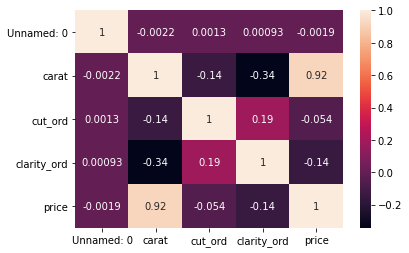

In [21]:
sns.heatmap(diamond.corr(), annot=True)

In [6]:
diamond.describe()

,Unnamed: 0,carat,cut_ord,clarity_ord,price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,0.798597,3.903980,4.126700,3939.103500
std,14433.901067,0.474651,1.117043,1.665564,3995.879832
min,1.000000,0.200000,1.000000,1.000000,326.000000
25%,12500.750000,0.400000,3.000000,3.000000,948.000000
50%,25000.500000,0.700000,4.000000,4.000000,2402.500000
75%,37500.250000,1.040000,5.000000,5.000000,5331.000000
max,50000.000000,5.010000,5.000000,8.000000,18823.000000


<Figure size 864x360 with 0 Axes>

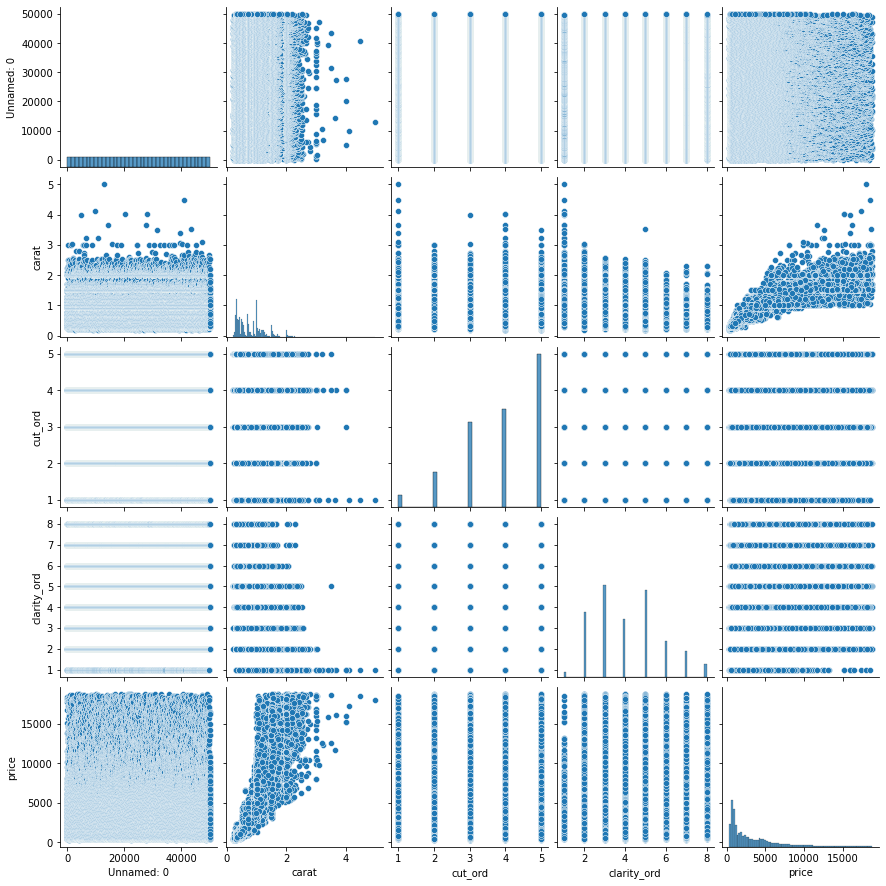

In [8]:
plt.figure(figsize=(12,5))
sns.pairplot(diamond)

# ML

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
X = diamond[["carat","clarity_ord"]]
y = diamond["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)


In [23]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)

print("\nX_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (40000, 2)
y_train:  (40000,)

X_test:  (10000, 2)
y_test:  (10000,)


In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

In [27]:
y_pred

array([5885.73515058, 9482.31248403, 3612.74676559, ..., 3052.70759373,
       8862.18017975, 6992.18277686])

In [28]:
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ",mean_squared_error(y_test, y_pred))
print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))

MAE:  917.8678865489164
MSE:  1883234.1731365037
RMSE:  1372.309794884706


C:\Users\user1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

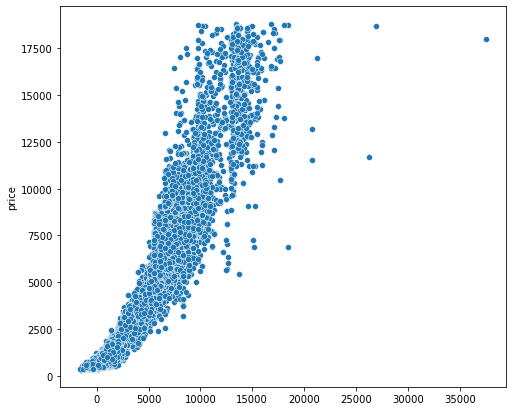

In [29]:
plt.figure(figsize=(8,7))
sns.scatterplot(y_pred, y_test)

<AxesSubplot:ylabel='price'>

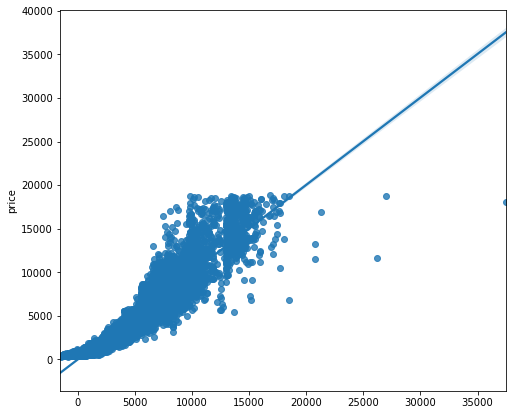

In [32]:
plt.figure(figsize=(8,7))
sns.regplot(y_pred, y_test)

In [33]:
model.coef_

array([8332.43399072,  476.71483195])